In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Kaggle/Kaggle

/content/drive/MyDrive/Kaggle/Kaggle


In [ ]:
import cv2
import numpy as np
import pandas as pd 

df = pd.read_csv('train.csv')
train_y = np.array(df['label'].values,np.int8)
df2 = pd.read_csv('train.csv',index_col=0)

images = np.array(df2.values,np.float32)

images = images.reshape(42000,28,28)
images =np.array(images,np.float32)
train_x = images
print(train_x.shape,train_y.shape)

(42000, 28, 28) (42000,)


In [ ]:
num_val = 8400
num_train = 42000 -num_val
X_train = train_x[:num_train].reshape(-1,28,28,1)
y_train = train_y[:num_train]
X_valid = train_x[num_train:].reshape(-1,28,28,1)
y_valid = train_y[num_train:]



In [ ]:
df3 = pd.read_csv('test.csv')
images_test = np.array(df3.values,np.float32)
images_test =images_test.reshape(28000,28,28,1) 

print(images_test.shape)

(28000, 28, 28, 1)


In [ ]:
aug = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0.18,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

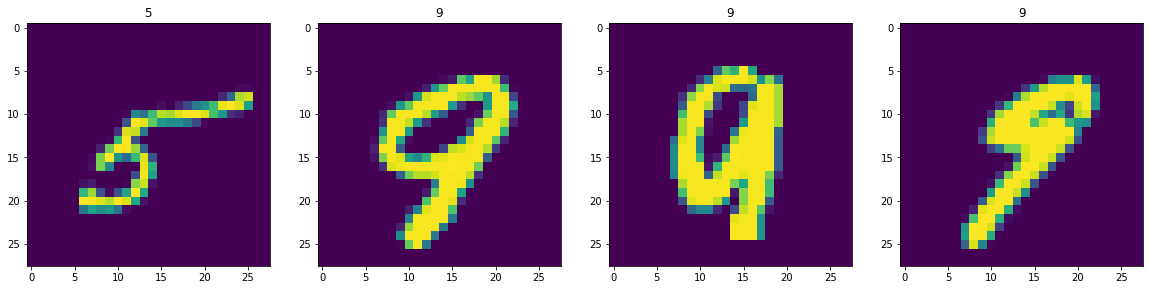

In [ ]:
import matplotlib.pyplot as plt

fg ,ax = plt.subplots(1,4,figsize=(20,6))
idx = np.random.choice(train_y.shape[0],4)
for i,id in enumerate(idx):
  ax[i].imshow(train_x[id])
  ax[i].set_title(str(train_y[id]))

In [ ]:
import tensorflow as tf
def custom_model_init_fn():
    model = None
    ############################################################################
    # TODO: Construct a three-layer ConvNet using tf.keras.Sequential.         #
    ############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    input_shape = (28,28,1)
    
    channel_1 , channel_2, channel_3, num_classes = 64, 128, 256, 10

    initializers = tf.initializers.VarianceScaling(scale=2.0)
    layers = [tf.keras.layers.Conv2D(input_shape = input_shape,filters = channel_1
                                     ,kernel_size=[5,5]
                                     ,padding='same', data_format='channels_last',
                                     activation ='relu',kernel_initializer = initializers,),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Conv2D(input_shape = input_shape,filters = channel_1
                                     ,kernel_size=[5,5]
                                     ,padding='same', data_format='channels_last',
                                     activation ='relu',kernel_initializer = initializers,),
              tf.keras.layers.BatchNormalization(),
              
              tf.keras.layers.MaxPool2D((2,2),(2,2),'valid','channels_last'),


              tf.keras.layers.Conv2D(input_shape = input_shape,filters = channel_2
                                     ,kernel_size=[3,3]
                                     ,padding='same', data_format='channels_last',
                                     activation ='relu',kernel_initializer = initializers,),
              tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Conv2D(input_shape = input_shape,filters = channel_2
                                     ,kernel_size=[3,3]
                                     ,padding='same', data_format='channels_last',
                                     activation ='relu',kernel_initializer = initializers,),
              tf.keras.layers.BatchNormalization(),

              tf.keras.layers.Conv2D(input_shape = input_shape,filters = channel_3
                                     ,kernel_size=[3,3]
                                     ,padding='same', data_format='channels_last',
                                     activation ='relu',kernel_initializer = initializers,),
              tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Conv2D(input_shape = input_shape,filters = channel_3
                                     ,kernel_size=[3,3]
                                     ,padding='same', data_format='channels_last',
                                     activation ='relu',kernel_initializer = initializers,),
              tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Conv2D(input_shape = input_shape,filters = channel_3
                                     ,kernel_size=[3,3]
                                     ,padding='same', data_format='channels_last',
                                     activation ='relu',kernel_initializer = initializers,),
              tf.keras.layers.BatchNormalization(),

              tf.keras.layers.MaxPool2D((2,2),(2,2),'valid','channels_last'),
              
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(512,activation='relu',kernel_initializer=initializers),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Dense(num_classes,activation='softmax',kernel_initializer=initializers,name='predict')]
    model = tf.keras.Sequential(layers=layers)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ############################################################################
    #                            END OF YOUR CODE                              #
    ############################################################################
    return model


def custom_optimizer_init_fn():
    learning_rate = 1e-3
    return tf.keras.optimizers.Adam(learning_rate ) 

In [ ]:
# Batch size, epochs and pool size below are all paramaters to fiddle with for optimization
batch_size = 64
epochs = 10

input_shape = train_x.shape[1:]

# Create the neural network
model = custom_model_init_fn()


# Compiling and training the model
model.compile(optimizer=custom_optimizer_init_fn(),
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])
#history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid))
history = model.fit_generator(aug.flow(X_train, y_train), epochs=epochs, validation_data=(X_valid, y_valid),steps_per_epoch=X_train.shape[0]//batch_size)

# Save model architecture and weights
model.save('Result')

# Show summary of model
model.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
525/525 [==============================] - 1069s 2s/step - loss: 0.5485 - sparse_categorical_accuracy: 0.8266 - val_loss: 0.3013 - val_sparse_categorical_accuracy: 0.9174
Epoch 2/10
525/525 [==============================] - 1069s 2s/step - loss: 0.2280 - sparse_categorical_accuracy: 0.9291 - val_loss: 0.2743 - val_sparse_categorical_accuracy: 0.9208
Epoch 3/10
525/525 [==============================] - 1071s 2s/step - loss: 0.1647 - sparse_categorical_accuracy: 0.9490 - val_loss: 0.1334 - val_sparse_categorical_accuracy: 0.9606
Epoch 4/10
525/525 [==============================] - 1071s 2s/step - loss: 0.1517 - sparse_categorical_accuracy: 0.9533 - val_loss: 0.0767 - val_sparse_categorical_accuracy: 0.9773
Epoch 5/10
525/525 [==============================] - 1069s 2s/step - loss: 0.1338 - sparse_categorical_accuracy: 0.9589 - val_loss: 0.1034 - val_sparse_categorical_accuracy: 0.9704
Epoch 6/10
525/525 [==============================] - 1070s 2s/step - loss: 0.1220 - spars

In [ ]:
predict = []

for i in range(images_test.shape[0]):
  image = images_test[i]
  image_expand = image[np.newaxis,...]
  image_expand = np.array(image_expand,np.float32)
  image_expand = tf.constant(image_expand)
  
  predict_angle = model.predict(image_expand)
  # infer = model.signatures['serving_default']
  # predict_angle = infer(image_expand)['predict'].numpy()
  predict.append(np.argmax(predict_angle))
#print(np.mean(predict == y_test))
# predict = np.array(predict)
# Acurray_test = np.mean(predict == y_test)
# print(predict)
# print(y_test)

# print("Acurray_test : {}".format(Acurray_test))

In [ ]:
from pandas import DataFrame
C = {'ImageId':range(1,images_test.shape[0]+1),
        'Label': predict,
    }
df = DataFrame(C, columns= ['ImageId','Label'])
export_csv = df.to_csv (r'result2.csv', index = None, header=True) # here you have to write path, where result file will be stored
print (df)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]
